<h1>1. Выбор данных</h1>

Abalone Data Set - http://archive.ics.uci.edu/ml/datasets/Abalone


<h1>4. Импорт библиотек</h1>

In [2]:
# Импортируем необходимые библиотеки для анализа данных

# Библиотеки работы с данными
import pandas as pd
import numpy as np

# Библиотки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка графиков
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams.update({'font.size': 18})

# Библиотека машинного обучения
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h1>5. Описание данных</h1>

Предсказание возраста морского ушка (моллюски) по физическим измерениям. Возраст морского ушка определяется путем разрезания раковины через конус, окрашивания ее и подсчета количества колец под микроскопом - скучная и трудоемкая задача. Другие измерения, которые легче получить, используются для прогнозирования возраста. Для решения проблемы может потребоваться дополнительная информация, такая как погодные условия и местоположение (следовательно, наличие продуктов питания).

**Название / Тип Данных / Единица измерения / Описание**

* Sex - Пол / номинальный / -- / M (мужчина), F (женщина) и I (младенец)
* Length - Длина / непрерывная / мм / Измерение самой длинной оболочки
* Diameter - Диаметр / непрерывный / мм / перпендикулярный длине
* Height - Высота / непрерывная / мм / с мясом в скорлупе
* Whole_weight - Весь вес / непрерывный / грамм / целое морское ушко
* Shucked_weight - Очищенный вес / непрерывный / грамм / вес мяса
* Viscera_weight - Вес внутренних органов / непрерывный / грамм / вес кишечника (после кровотечения)
* Shell_weight - Вес скорлупы / непрерывный / грамм / после сушки
* Rings - Кольца / целое число / -- / +1.5 дает возраст в годах

In [3]:
# Импортируем данные
names = [
    'Sex', 'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

df = pd.read_csv('abalone.csv', names=names)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
df['Whole_weight_class'] = np.where(df.Whole_weight > 1, 'Over 1', 'Less 1')

In [5]:
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Less 1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Less 1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Less 1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Less 1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Less 1


<h1>6. Подготовка данных</h1>

In [6]:
df.info() # пропущенных данных нет; неверно интерпретирвоанных данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   Length              4177 non-null   float64
 2   Diameter            4177 non-null   float64
 3   Height              4177 non-null   float64
 4   Whole_weight        4177 non-null   float64
 5   Shucked_weight      4177 non-null   float64
 6   Viscera_weight      4177 non-null   float64
 7   Shell_weight        4177 non-null   float64
 8   Rings               4177 non-null   int64  
 9   Whole_weight_class  4177 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 326.5+ KB


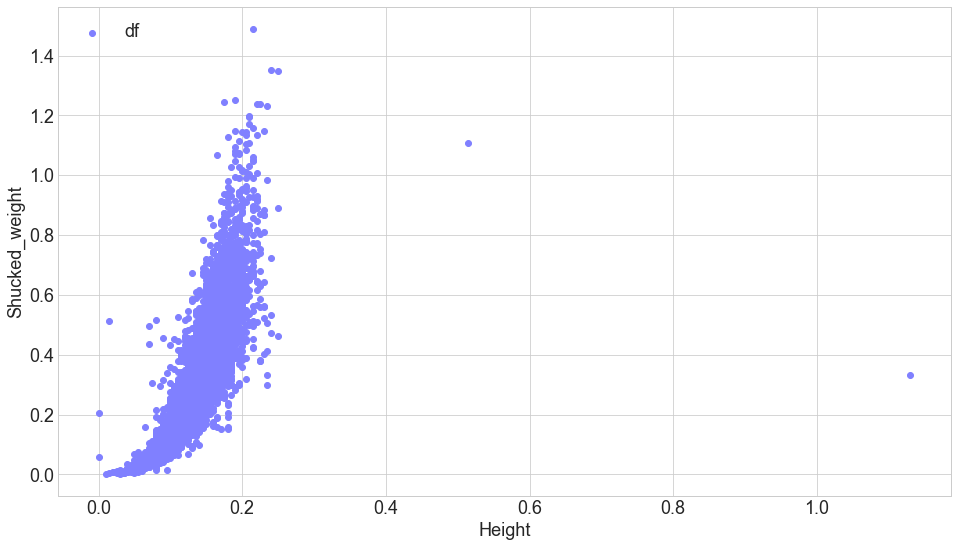

In [7]:
fig, ax = plt.subplots()
ax.scatter(df.Height, df.Shucked_weight, label='df', c='#8080ff')
ax.set_xlabel('Height')
ax.set_ylabel('Shucked_weight')
plt.legend(loc='upper left')

Видно, что имеется два выброса в тестовой выборке - удалим их

In [8]:
df = df.drop(index=list(df.query("Height>0.4").index))

<h1>7. Матрица корреляции</h1>

<AxesSubplot:>

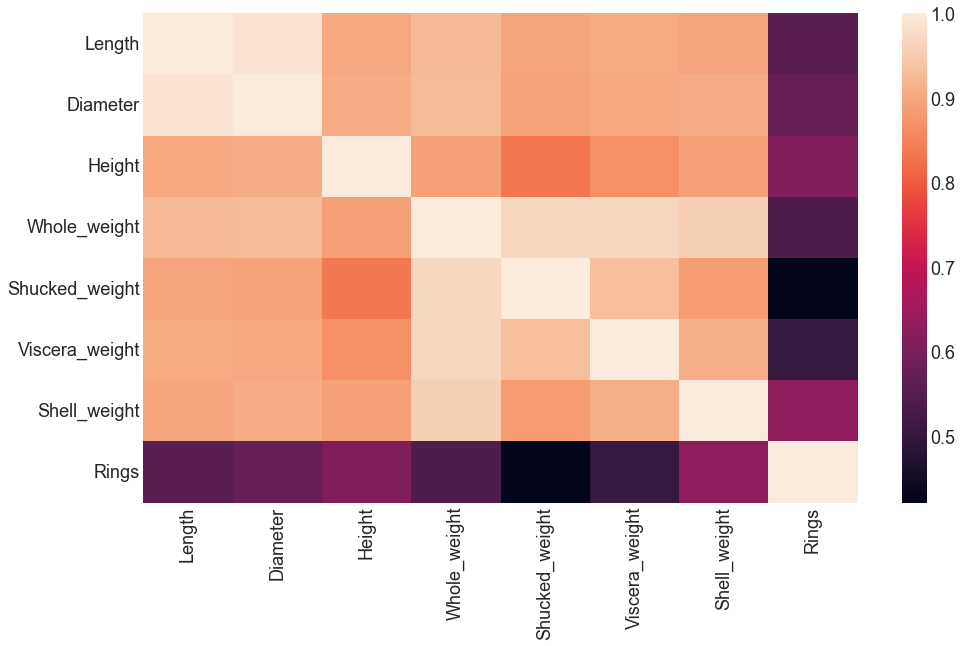

In [9]:
sns.heatmap(data=df.corr())
# Height, Shucked_weight - берем за факторы
# Whole_weight - берем за переменную отклика

In [10]:
X, y = df[['Height', 'Shucked_weight']].values, df['Whole_weight_class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
df[['Height', 'Shucked_weight', 'Whole_weight_class']].head(5)

,Height,Shucked_weight,Whole_weight_class
0,0.095,0.2245,Less 1
1,0.090,0.0995,Less 1
2,0.135,0.2565,Less 1
3,0.125,0.2155,Less 1
4,0.080,0.0895,Less 1


In [13]:
print(f"Общий размер данных факторов: {X.shape}")
print(f"Общий размер данных переменной отклика: {y.shape}.")
print()
print(f"Размер тренировочных данных факторов: {X_train.shape}")
print(f"Размер тренировочных данных переменной отклика:{y_train.shape}")
print()
print(f"Размер тестовых данных факторов: {X_test.shape}")
print(f"Размер тестовых данных переменной отклика:{y_test.shape}")

# проверка на корректность разделения данных
assert X.shape[0] == X_train.shape[0] + X_test.shape[0]
assert y.shape[0] == y_train.shape[0] + y_test.shape[0]

Общий размер данных факторов: (4175, 2)
Общий размер данных переменной отклика: (4175,).

Размер тренировочных данных факторов: (2505, 2)
Размер тренировочных данных переменной отклика:(2505,)

Размер тестовых данных факторов: (1670, 2)
Размер тестовых данных переменной отклика:(1670,)


<AxesSubplot:xlabel='Height', ylabel='Shucked_weight'>

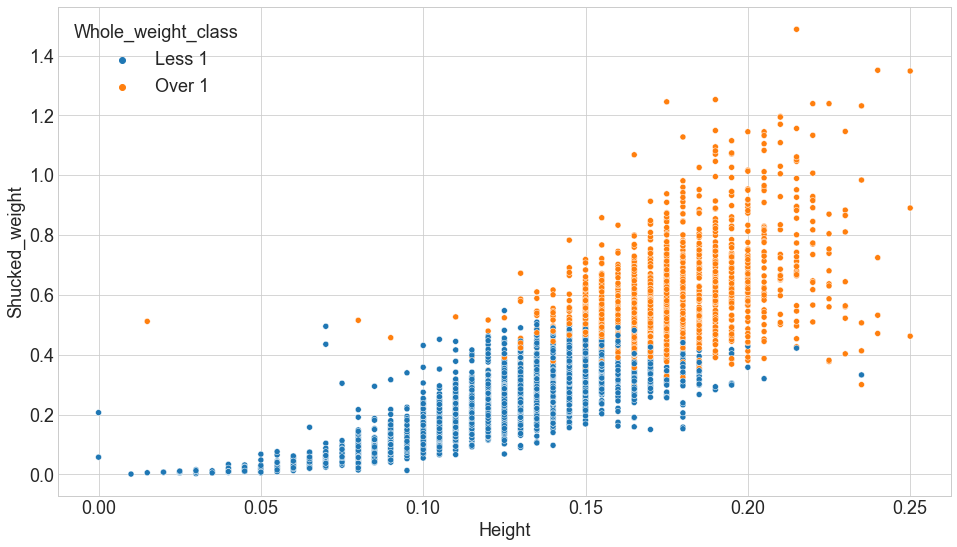

In [15]:
sns.scatterplot(data=df, x='Height', y='Shucked_weight', hue='Whole_weight_class')

In [17]:
classifier = Perceptron()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

print(f'Количество неправильно отмеченных точек из общего числа точек: {X_test.shape[0], (y_test!=y_pred).sum()}')

              precision    recall  f1-score   support

      Less 1       0.97      0.95      0.96      1113
      Over 1       0.91      0.94      0.93       557

    accuracy                           0.95      1670
   macro avg       0.94      0.95      0.94      1670
weighted avg       0.95      0.95      0.95      1670

[[1062   51]
 [  33  524]]
Количество неправильно отмеченных точек из общего числа точек: (1670, 84)


In [18]:
dat = {'y_Actual': y_test, 'y_Predicted': y_pred}
dff = pd.DataFrame(dat, columns=['y_Actual', 'y_Predicted'])
cross_table=pd.crosstab(dff['y_Actual'], dff['y_Predicted'],
                       rownames=['Actual'], colnames=['Predicted'], margins=True)
print(cross_table)

Predicted  Less 1  Over 1   All
Actual                         
Less 1       1062      33  1095
Over 1         51     524   575
All          1113     557  1670


In [19]:
100*round(1-(51+33)/1670, 2)

95.0